In [1]:
import sherpa
sherpa.__version__

'4.14.0'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import astropy.units as u
from astropy.io import fits

In [43]:
from sherpa.astro import io
from sherpa.data import DataSimulFit
from sherpa.models.basic import PowLaw1D
from sherpa.models.model import SimulFitModel
from sherpa.astro.xspec import XSwabs
from sherpa.fit import Fit
from sherpa.plot import ModelPlot, DataPlot, 
from sherpa.stats import WStat

In [32]:
pha_pn = io.read_pha('./XMM/xmm_files/PN_PWN.grp', use_errors=False, use_background=False)
pha_pn.ignore(12.4,)
pha_mos1 = io.read_pha('./XMM/xmm_files/MOS1_PWN.grp', use_errors=False, use_background=False)
pha_mos1.ignore(12.9,)
pha_mos2 = io.read_pha('./XMM/xmm_files/MOS2_PWN.grp', use_errors=False, use_background=False)
pha_mos2.ignore(10.4,)

read ARF file ./XMM/xmm_files/MOS2_PWN.arf
read RMF file ./XMM/xmm_files/MOS2_PWN.rmf
read background file ./XMM/xmm_files/MOS2_PWN_bkg.fits
read ARF file ./XMM/xmm_files/MOS1_PWN.arf


/home/lucagiunti/miniconda3/envs/ciao-4.14/lib/python3.8/site-packages/sherpa/astro/data.py:952: UserWarning: The minimum ENERG_LO in the ARF './XMM/xmm_files/MOS2_PWN.arf' was 0 and has been replaced by 1e-10
  warnings.warn(wmsg)
/home/lucagiunti/miniconda3/envs/ciao-4.14/lib/python3.8/site-packages/sherpa/astro/data.py:952: UserWarning: The minimum ENERG_LO in the RMF './XMM/xmm_files/MOS2_PWN.rmf' was 0 and has been replaced by 1e-10
  warnings.warn(wmsg)
/home/lucagiunti/miniconda3/envs/ciao-4.14/lib/python3.8/site-packages/sherpa/astro/data.py:952: UserWarning: The minimum ENERG_LO in the ARF './XMM/xmm_files/MOS1_PWN.arf' was 0 and has been replaced by 1e-10
  warnings.warn(wmsg)


read RMF file ./XMM/xmm_files/MOS1_PWN.rmf
read background file ./XMM/xmm_files/MOS1_PWN_bkg.fits
read ARF file ./XMM/xmm_files/MOS2_PWN.arf
read RMF file ./XMM/xmm_files/MOS2_PWN.rmf


/home/lucagiunti/miniconda3/envs/ciao-4.14/lib/python3.8/site-packages/sherpa/astro/data.py:952: UserWarning: The minimum ENERG_LO in the RMF './XMM/xmm_files/MOS1_PWN.rmf' was 0 and has been replaced by 1e-10
  warnings.warn(wmsg)
/home/lucagiunti/miniconda3/envs/ciao-4.14/lib/python3.8/site-packages/sherpa/astro/data.py:952: UserWarning: The minimum ENERG_LO in the ARF './XMM/xmm_files/MOS2_PWN.arf' was 0 and has been replaced by 1e-10
  warnings.warn(wmsg)
/home/lucagiunti/miniconda3/envs/ciao-4.14/lib/python3.8/site-packages/sherpa/astro/data.py:952: UserWarning: The minimum ENERG_LO in the RMF './XMM/xmm_files/MOS2_PWN.rmf' was 0 and has been replaced by 1e-10
  warnings.warn(wmsg)


read background file ./XMM/xmm_files/MOS2_PWN_bkg.fits


In [33]:
pha_pn

<DataPHA data set instance './XMM/xmm_files/PN_PWN.grp'>

In [34]:
pha_mos1

<DataPHA data set instance './XMM/xmm_files/MOS1_PWN.grp'>

In [35]:
pha_mos2

<DataPHA data set instance './XMM/xmm_files/MOS2_PWN.grp'>

In [36]:
data_simul = DataSimulFit("joint", [pha_pn, pha_mos1, pha_mos2])

In [37]:
pl = PowLaw1D()
abs_model = XSwabs()
model = pl * abs_model
model

<BinaryOpModel model instance '(powlaw1d * wabs)'>

In [38]:
model_simu = SimulFitModel("mymodel", [model, model, model])

In [39]:
wstat=WStat()
fit = Fit(data=data_simul, model=model_simu, stat=wstat)
result = fit.fit()
print(result.format())

Method                = levmar
Statistic             = wstat
Initial fit statistic = 996.616
Final fit statistic   = 263.862 at function evaluation 206
Data points           = 108
Degrees of freedom    = 105
Probability [Q-value] = 1.16119e-15
Reduced statistic     = 2.51298
Change in statistic   = 732.754
   powlaw1d.gamma   1.89929      +/- 0.0796781   
   powlaw1d.ampl   73847.9      +/- 35308.3     
   wabs.nH        1e+06        +/- 0           


/home/lucagiunti/miniconda3/envs/ciao-4.14/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)


In [40]:
fit.model

<SimulFitModel model instance 'mymodel'>

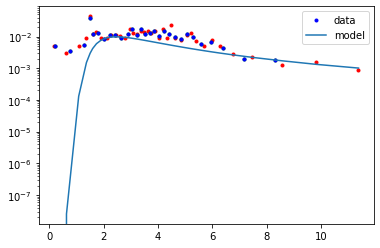

In [41]:
dplot = DataPlot()
dplot.prepare(pha_pn)
dplot.plot(color="r", overplot=True)
dplot = DataPlot()
dplot.prepare(pha_mos2)
dplot.plot(color="g", overplot=True)
dplot = DataPlot()
dplot.prepare(pha_mos2)
dplot.plot(color="b", overplot=True)

mplot = ModelPlot()
mplot.prepare(pha_pn, model)
ax = plt.gca()
ax.lines[-1].set_label('data')
mplot.overplot()
ax.lines[-1].set_label('model')
plt.legend()
plt.yscale("log")

In [42]:
delchi = DelchiPlot()
delchi.prepare(pha_pn, model, fit.stat)
delchi.plot(color="r", overplot=True)
delchi.prepare(pha_mos1, model, fit.stat)
delchi.plot(color="g", overplot=True)
delchi.prepare(pha_mos2, model, fit.stat)
delchi.plot(color="b", overplot=True)

/home/lucagiunti/miniconda3/envs/ciao-4.14/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)


StatErr: ChisqrPlot not applicable using current statistic: wstat

In [16]:
#Reference values obtained with gammapy/3ML
#ref_index = (1.7351, 2.628e-01)
#ref_amlpitude = (4.7251e-04, 2.111e-04)
#ref_nH = (5.6632, 8.781e-01)

#index = (pl.gamma.val, pl.gamma.error)

In [17]:
for dataset in data_simul.datasets:
    dataset.notice(5, 10)

In [19]:
fit = Fit(data_simul, model_simu)
result = fit.fit()
print(result.format())

Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 106.908
Final fit statistic   = 22.5904 at function evaluation 225
Data points           = 30
Degrees of freedom    = 27
Probability [Q-value] = 0.706811
Reduced statistic     = 0.83668
Change in statistic   = 84.3177
   powlaw1d.gamma   3.39349      +/- 0.00771537  
   powlaw1d.ampl   1.64852e+09  +/- 0           
   wabs.nH        1.2          +/- 0           


/home/lucagiunti/miniconda3/envs/ciao-4.14/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)


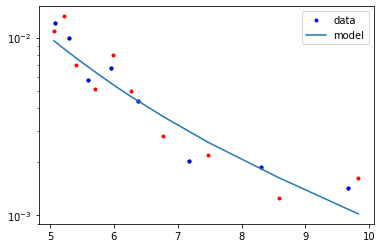

In [20]:
dplot = DataPlot()
dplot.prepare(pha_pn)
dplot.plot(color="r", overplot=True)
dplot = DataPlot()
dplot.prepare(pha_mos2)
dplot.plot(color="g", overplot=True)
dplot = DataPlot()
dplot.prepare(pha_mos2)
dplot.plot(color="b", overplot=True)

mplot = ModelPlot()
mplot.prepare(pha_pn, model)
ax = plt.gca()
ax.lines[-1].set_label('data')
mplot.overplot()
ax.lines[-1].set_label('model')
plt.legend()
plt.yscale("log")

/home/lucagiunti/miniconda3/envs/ciao-4.14/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)


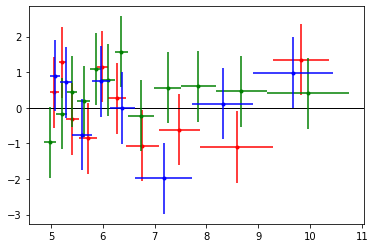

In [21]:
delchi = DelchiPlot()
delchi.prepare(pha_pn, model, fit.stat)
delchi.plot(color="r", overplot=True)
delchi.prepare(pha_mos1, model, fit.stat)
delchi.plot(color="g", overplot=True)
delchi.prepare(pha_mos2, model, fit.stat)
delchi.plot(color="b", overplot=True)